# Compare Synthesized Acoustic with Recorded Acoustic 

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
import librosa
from librosa import feature
from IPython import display
from matplotlib import cm
from functools import partial
np_load_old = partial(np.load)
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

%matplotlib inline

In [2]:
mfcc_syn = np.load('../data/feature_eda/prep_exp11/features.npy')
mfcc_record = np.load('../data/d_records/d_record_set_2/prep_exp11/features.npy')

In [3]:
def plot_mfcc(mfcc, idx=1):
    fig, ax = plt.subplots(figsize=(10,5))
    cax = ax.imshow(np.swapaxes(mfcc[idx], 0 ,1)[:13], interpolation='nearest', cmap=cm.coolwarm, origin='lower')
    ax.set_title('MFCC')

    plt.show()

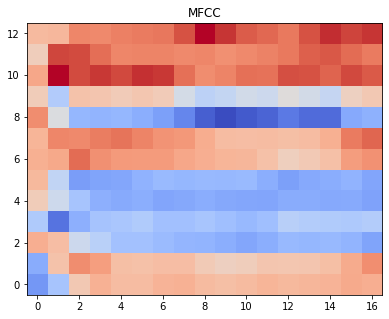

In [4]:
plot_mfcc(mfcc_syn, idx=0)

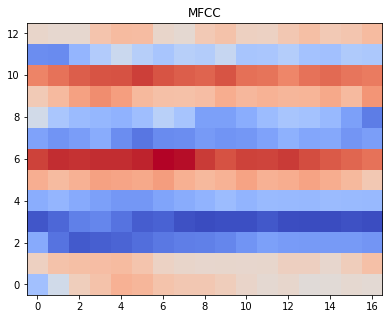

In [5]:
plot_mfcc(mfcc_record, idx=0)

In [12]:
mfcc_syn.shape

(162, 17, 39)

In [34]:
mean_mfcc_1_syn = np.mean(mfcc_syn, axis=1)
mean_mfcc_1_rec = np.mean(mfcc_record, axis=1)

In [35]:
np.mean(mfcc_syn, axis=1).shape

(162, 39)

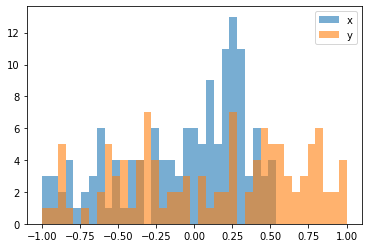

In [40]:
bins = np.linspace(-1, 1, 40)
plt.hist(mean_mfcc_1_syn[:,0], bins,alpha=0.6, label='x')
plt.hist(mean_mfcc_1_rec[:,0], bins, alpha=0.6, label='y')
plt.legend(loc='upper right')
plt.show()

## Load Audio

In [17]:
audio_data = np.load('../data/d_dataset_13/dataset.npz')['ns_audio_data']
index = np.random.choice(audio_data.shape[0], 2000, replace=False)  
audio_data = audio_data[index]

In [18]:
def padding(audio_data):
    audio_length = 19407
    return np.array([data[:audio_length] if data.shape[0] > audio_length else np.pad(data, (max(0,audio_length - data.shape[0]),0), "constant") for data in audio_data])

In [19]:
audio_data_pad = padding(audio_data)

In [20]:
def to_mfcc(audio_data):
    mfcc = np.array([ librosa.feature.mfcc(data, sr=22050, n_fft=2048, hop_length=512) for data in audio_data ])
    return mfcc

In [21]:
audio_mfcc = to_mfcc(audio_data_pad)

In [39]:
def plot_diff_dist(data_x, data_y, mfcc_idx=0):
    bins = np.linspace(-50, 50, 100)
    plt.hist(np.mean(data_x, axis=1)[:,1], bins,alpha=0.6, label='augment')
    plt.hist(np.mean(data_y, axis=1)[:,1], bins, alpha=0.6, label='original')
    plt.legend(loc='upper right')
    plt.show()

## Add background noise

In [23]:
def add_white_noise(audio_data):
    return np.array([ data + np.random.uniform(low=0.001,high=0.01)*np.random.randn(data.shape[0]) for data in audio_data ])

In [24]:
white_mfcc = to_mfcc(add_white_noise(audio_data_pad))

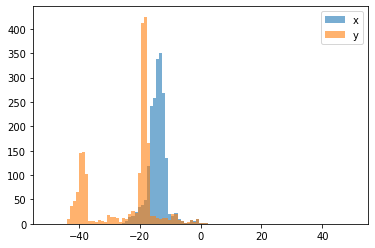

In [25]:
plot_diff_dist(white_mfcc, audio_mfcc, mfcc_idx=0)

## Change Pitch

In [26]:
def change_pitch(audio_data):
    return np.array([librosa.effects.pitch_shift(data, sr=16000, n_steps=np.random.uniform(low=-2.0,high=6)) for data in audio_data])

In [27]:
pitch_mfcc = to_mfcc(change_pitch(audio_data_pad))

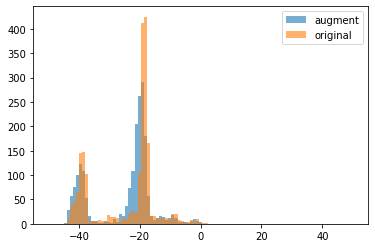

In [40]:
plot_diff_dist(pitch_mfcc, audio_mfcc, mfcc_idx=0)

## Amplify Value

In [31]:
def amplify_value(audio_data):
    return np.array([ data*np.random.uniform(low=-1.5,high=-3) for data in audio_data])

In [34]:
audio_data[0]

array([ 0.        ,  0.        ,  0.        , ..., -0.04506776,
       -0.04853116,  0.        ], dtype=float32)

In [35]:
audio_data[0]*np.random.uniform(low=-1.5,high=-3)

array([-0.        , -0.        , -0.        , ...,  0.09254587,
        0.09965789, -0.        ], dtype=float32)

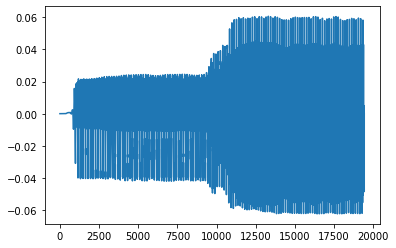

In [37]:
plt.plot(audio_data[0])

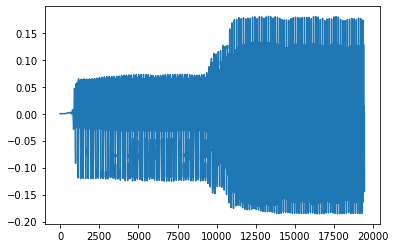

In [38]:
plt.plot(audio_data[0]*np.random.uniform(low=1.5,high=3))

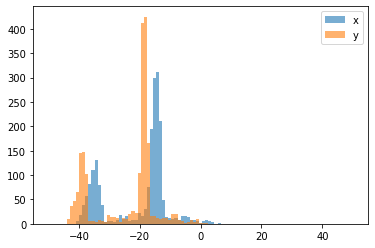

In [32]:
amp_mfcc = to_mfcc(amplify_value(audio_data_pad))
plot_diff_dist(amp_mfcc, audio_mfcc, mfcc_idx=0)

In [16]:
amp = amplify_value(audio_data_pad)

In [163]:
display.Audio(amp[0], rate=16000)

In [ ]:
librosa.core.load('..\data\d_eval\sound\sound0.wav')